# K-Means


In [4]:
%load_ext autoreload

In [5]:
%autoreload

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import k_means as km

sns.set_style('darkgrid')

## First Dataset

In [7]:
data_1 = pd.read_csv('data_1.csv')

### Visualize Data

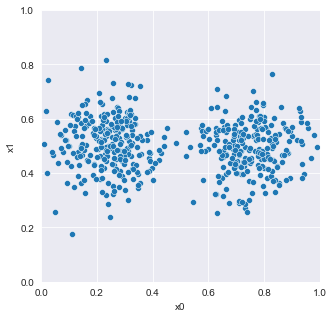

In [8]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x0', y='x1', data=data_1)
plt.xlim(0, 1); plt.ylim(0, 1);

### Fit and Evaluate

Silhouette Score: 0.672
Distortion: 8.837


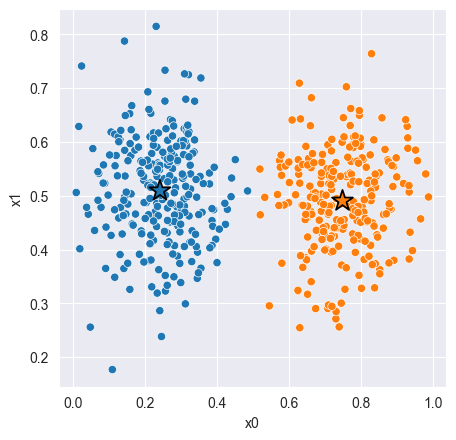

In [10]:
# Fit Model 
X = data_1[['x0', 'x1']]
model_1 = km.KMeans() # <-- Should work with default constructor  
model_1.fit(X)

# Compute Silhouette Score 
z = model_1.predict(X)
print(f'Silhouette Score: {km.euclidean_silhouette(X, z) :.3f}')
print(f'Distortion: {km.euclidean_distortion(X, z) :.3f}')

# Plot cluster assignments
C = model_1.get_centroids()
K = len(C)
_, ax = plt.subplots(figsize=(5, 5), dpi=100)
sns.scatterplot(x='x0', y='x1', hue=z, hue_order=range(K), palette='tab10', data=X, ax=ax);
sns.scatterplot(x=C[:,0], y=C[:,1], hue=range(K), palette='tab10', marker='*', s=250, edgecolor='black', ax=ax)
ax.legend().remove();

## Second Dataset

In [9]:
data_2 = pd.read_csv('data_2.csv')

### Visualize Data

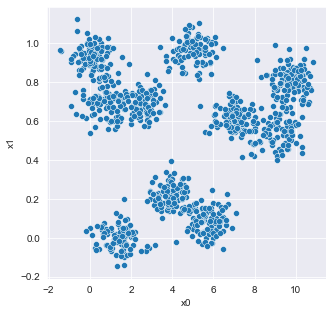

In [30]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x0', y='x1', data=data_2);

## Normalize the data

In [13]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

### Fit and Evaluate


Distortion: 4.230
Silhouette Score: 0.574


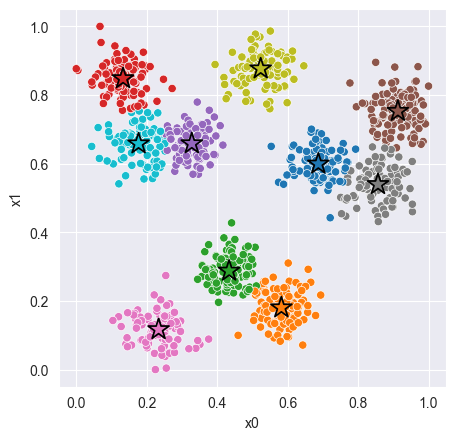

In [16]:
# Fit Model
Xc = data_2[['x0', 'x1']]
model_2 = km.KMeans(k=10, original_data=Xc, iterations=50)  # <-- Feel free to add hyperparameters
X = normalize(Xc)
model_2.fit(X)

# Compute Silhouette Score
z = model_2.predict(X)
print(f'Distortion: {km.euclidean_distortion(X, z) :.3f}')
print(f'Silhouette Score: {km.euclidean_silhouette(X, z) :.3f}')

# Plot cluster assignments
C = model_2.get_centroids()
K = len(C)
_, ax = plt.subplots(figsize=(5, 5), dpi=100)
sns.scatterplot(x='x0', y='x1', hue=z, hue_order=range(K), palette='tab10', data=X, ax=ax)
sns.scatterplot(x=C[:, 0], y=C[:, 1], hue=range(K), palette='tab10', marker='*', s=250, edgecolor='black', ax=ax)
ax.legend().remove()